# Basic Preprocessing

<div class="alert-success">
Nama :Arif Su'admaji
</div>

<div class="alert-danger">
Github : https://github.com/arifsuadmaji
</div>

<div class="alert-warning">
Pengantar Data Mining
</div>

<div class="alert-info">
2023
</div

# Import Library

In [1]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

# Input Data

In [2]:
df = pd.read_csv("./data/titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Show last 5 lines

In [3]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Feature Selection(Variabel)

In [4]:
df.drop(columns=['Name','Ticket'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


# Checking duplicated dataset 

In [5]:
df.duplicated()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887     True
888    False
889    False
890    False
891    False
Length: 891, dtype: bool

# Check Missing Value

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Information of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


# Handling Missing Value

### Drop

In [8]:
df.drop(columns=['Cabin'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Fillna with Mean or Median

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())

#df['Age'] = df['Age'].fillna(df['Age'].mean())

#df['Age'] = df['Age'].fillna(0)

Ingat!! Metode diatas hanya digunakan ketika tipe data numerik, tidak untuk data kategori

### Bagaimana untuk tipe data Kategori?

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Fillna with most frequensi

In [13]:
df.fillna({'Embarked':'S'}, inplace=True)

# df.dropna(columns=['Embarked'], axis=0, inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Checking Outlier

In [15]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot: >

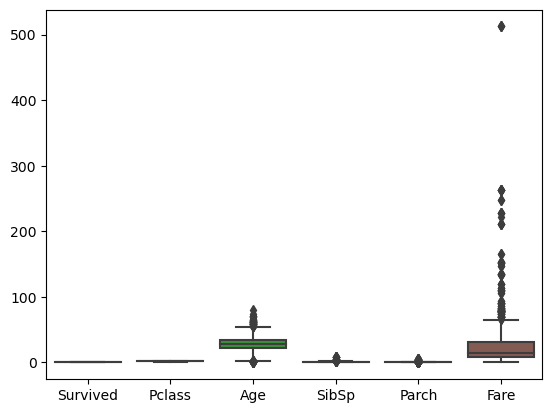

In [16]:
sns.boxplot(df)

Dapat dilihat pada plot bahwa terdapat outlier dalam variabel `Fare`

# Train-Test Split

In [17]:
X = df.drop(columns='Survived')
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

# Handling outlier with Scaller

In [18]:
X_train['Fare']

PassengerId
332     28.5000
734     13.0000
383      7.9250
705      7.8542
814     31.2750
         ...   
107      7.6500
271     31.0000
861     14.1083
436    120.0000
103     77.2875
Name: Fare, Length: 712, dtype: float64

In [19]:
columns = ['Fare']
scaler = MinMaxScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [20]:
X_train['Fare']

PassengerId
332    0.055628
734    0.025374
383    0.015469
705    0.015330
814    0.061045
         ...   
107    0.014932
271    0.060508
861    0.027538
436    0.234224
103    0.150855
Name: Fare, Length: 712, dtype: float64

<AxesSubplot: >

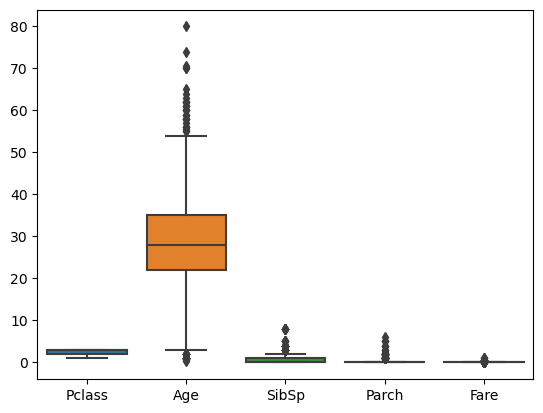

In [21]:
sns.boxplot(X_train)

# Encoding

In [22]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [23]:
encoder = LabelEncoder()
X_train['Sex'] = encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = encoder.transform(X_test['Sex'])

In [24]:
encoder = LabelEncoder()
X_train['Embarked'] = encoder.fit_transform(X_train['Embarked'])
X_test['Embarked'] = encoder.transform(X_test['Embarked'])

In [25]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
332,1,1,45.5,0,0,0.055628,2
734,2,1,23.0,0,0,0.025374,2
383,3,1,32.0,0,0,0.015469,2
705,3,1,26.0,1,0,0.015330,2
814,3,0,6.0,4,2,0.061045,2
...,...,...,...,...,...,...,...
107,3,0,21.0,0,0,0.014932,2
271,1,1,28.0,0,0,0.060508,2
861,3,1,41.0,2,0,0.027538,2
